In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np
import random as rd
from sklearn.datasets import make_blobs
import math
import scipy as sp
from sklearn.cluster import KMeans

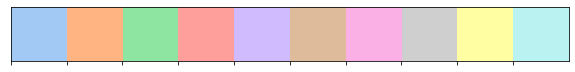

In [2]:
sns.set_palette("pastel")
sns.palplot(sns.color_palette("pastel"))

In [91]:
X_train = pd.read_csv("data/1월.csv",encoding = "euc-kr")
X_test = pd.read_csv("data/2월.csv",encoding = "euc-kr")
X_train

순위                                   서명  \
0      1                      (이상한 과자 가게) 전천당   
1      1                                 흔한남매   
2      3                                 흔한남매   
3      3                                 흔한남매   
4      5                               흔한남매 5   
..   ...                                  ...   
195  180                   천 개의 파랑 :천선란 장편소설    
196  180  (백종원의) 도전 요리왕 :음식으로 맛보는 세계 역사 문화 체험   
197  180  (백종원의) 도전 요리왕 :음식으로 맛보는 세계 역사 문화 체험   
198  199                                  심판    
199  199                        채식주의자:한강 연작소설   

                                            저자           출판사          ISBN  \
0                            히로시마 레이코 글;김정화 옮김          길벗스쿨  9.790000e+12   
1                            원작: 흔한남매 ;그림: 유난희           미래엔  9.790000e+12   
2                            원작: 흔한남매 ;그림: 유난희           미래엔  9.790000e+12   
3                            원작: 흔한남매 ;그림: 유난희           미래엔  9.790000e+12   
4    흔한남매 (지은이), 백난도 (글), 유난희 (그림), 흔한컴퍼니 (감수)          아이세움  9.790000e+12   
..                                         ...           ...           ...   
195                                   지은이: 천선란            허블  9.790000e+12   
196                             글: 백종원,그림: 이정태  위즈덤하우스 미디어그룹  9.790000e+12   
197                             글: 백종원,그림: 이정태  위즈덤하우스 미디어그룹  9.790000e+12   
198                       베르나르 베르베르 지음 ;전미연 옮김          열린책들  9.790000e+12   
199                                         한강            창비  9.790000e+12   

    ISBN부가기호     KDC        ISBN_S  
0      74830   833.6  9.791160e+17  
1      77810   810.0  9.791160e+17  
2      77810   810.0  9.791160e+17  
3      77810   810.0  9.791160e+17  
4      77810  1001.0  9.791160e+17  
..       ...     ...           ...  
195     3810   813.7  9.791190e+16  
196    74900   594.0  9.791190e+17  
197    74900   594.0  9.791190e+17  
198     3860   862.0  9.788930e+16  
199     3810   813.6  9.788940e+16  

[200 rows x 8 columns]

In [92]:
X_train.describe()

순위          ISBN          KDC        ISBN_S
count  200.000000  2.000000e+02   200.000000  2.000000e+02
mean    95.505000  9.790000e+12   746.000111  7.092924e+17
std     55.236904  0.000000e+00   222.530013  4.135568e+17
min      1.000000  9.790000e+12    29.800000  9.788950e+12
25%     45.000000  9.790000e+12   711.400000  9.791190e+16
50%     93.000000  9.790000e+12   813.700000  9.788950e+17
75%    142.000000  9.790000e+12   845.950000  9.791160e+17
max    199.000000  9.790000e+12  1001.000000  9.791200e+17

In [5]:
# for x in range(0, 990, 100):
#     start = x
#     end = x+100
#     temp = df[(df["KDC"] >= start) & (df["KDC"] < end)]
#     print("{}이상 {}미만 : {}".format(start, end, temp["KDC"].mean()))

In [6]:
# temp

In [93]:
bins = list(range(0, 1101, 100))
bins

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100]

In [94]:
bins_label = [str(x) for x in bins]
bins_label

['0',
 '100',
 '200',
 '300',
 '400',
 '500',
 '600',
 '700',
 '800',
 '900',
 '1000',
 '1100']

In [95]:
X_train["KDC_C"] = pd.cut(X_train["KDC"], bins, right=False, labels=bins_label[:-1])
X_train

순위                                   서명  \
0      1                      (이상한 과자 가게) 전천당   
1      1                                 흔한남매   
2      3                                 흔한남매   
3      3                                 흔한남매   
4      5                               흔한남매 5   
..   ...                                  ...   
195  180                   천 개의 파랑 :천선란 장편소설    
196  180  (백종원의) 도전 요리왕 :음식으로 맛보는 세계 역사 문화 체험   
197  180  (백종원의) 도전 요리왕 :음식으로 맛보는 세계 역사 문화 체험   
198  199                                  심판    
199  199                        채식주의자:한강 연작소설   

                                            저자           출판사          ISBN  \
0                            히로시마 레이코 글;김정화 옮김          길벗스쿨  9.790000e+12   
1                            원작: 흔한남매 ;그림: 유난희           미래엔  9.790000e+12   
2                            원작: 흔한남매 ;그림: 유난희           미래엔  9.790000e+12   
3                            원작: 흔한남매 ;그림: 유난희           미래엔  9.790000e+12   
4    흔한남매 (지은이), 백난도 (글), 유난희 (그림), 흔한컴퍼니 (감수)          아이세움  9.790000e+12   
..                                         ...           ...           ...   
195                                   지은이: 천선란            허블  9.790000e+12   
196                             글: 백종원,그림: 이정태  위즈덤하우스 미디어그룹  9.790000e+12   
197                             글: 백종원,그림: 이정태  위즈덤하우스 미디어그룹  9.790000e+12   
198                       베르나르 베르베르 지음 ;전미연 옮김          열린책들  9.790000e+12   
199                                         한강            창비  9.790000e+12   

    ISBN부가기호     KDC        ISBN_S KDC_C  
0      74830   833.6  9.791160e+17   800  
1      77810   810.0  9.791160e+17   800  
2      77810   810.0  9.791160e+17   800  
3      77810   810.0  9.791160e+17   800  
4      77810  1001.0  9.791160e+17  1000  
..       ...     ...           ...   ...  
195     3810   813.7  9.791190e+16   800  
196    74900   594.0  9.791190e+17   500  
197    74900   594.0  9.791190e+17   500  
198     3860   862.0  9.788930e+16   800  
199     3810   813.6  9.788940e+16   800  

[200 rows x 9 columns]

In [10]:
# 만약 이름이 수치화가 안되어있어서문제라면....전부 코드로 가져와야 한다.....
# ISBN으로 가져왔다.....

In [96]:
X_train.drop(['서명'], axis = 1, inplace = True)
X_train.drop(['저자'], axis = 1, inplace = True)
X_train.drop(['출판사'], axis = 1, inplace = True)
X_train.drop(['ISBN'], axis = 1, inplace = True)
X_train.drop(['ISBN부가기호'], axis = 1, inplace = True)
X_train.drop(['순위'], axis = 1, inplace = True)
X_train

KDC        ISBN_S KDC_C
0     833.6  9.791160e+17   800
1     810.0  9.791160e+17   800
2     810.0  9.791160e+17   800
3     810.0  9.791160e+17   800
4    1001.0  9.791160e+17  1000
..      ...           ...   ...
195   813.7  9.791190e+16   800
196   594.0  9.791190e+17   500
197   594.0  9.791190e+17   500
198   862.0  9.788930e+16   800
199   813.6  9.788940e+16   800

[200 rows x 3 columns]

# Elbow Method 로 최적화 지점 찾기

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [97]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit_transform(X_train)
feature = scaler.fit_transform(X_train)

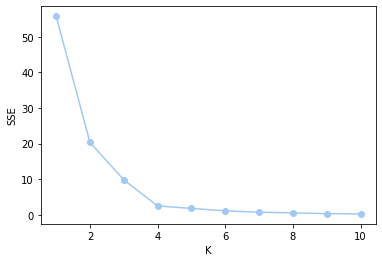

In [98]:
def elbow(X):
    sse = []

    for i in range(1,11):
        km = KMeans(n_clusters=i,algorithm='auto', random_state=69)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()

elbow(feature)

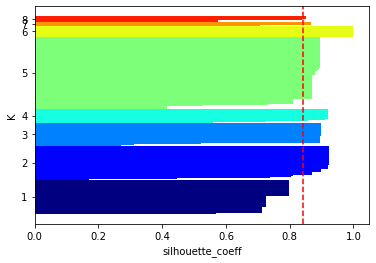

In [120]:
import numpy as np
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs 
from matplotlib import cm

def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)

        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)

    silhoutte_avg = np.mean(silhouette_vals)
    plt.axvline(silhoutte_avg, color = 'red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('K')
    plt.xlabel('silhouette_coeff')
    plt.show()

k= 8

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.5,
                  shuffle=True, random_state=0)
km = KMeans(n_clusters=k, algorithm='auto', random_state=72)
y_km = km.fit_predict(feature)
plotSilhouette(feature, y_km)

In [121]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt

k = 8
# create model and prediction
model = KMeans(n_clusters=k,algorithm='auto', init='k-means++', n_init=10,random_state=69)
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

In [122]:
# 결과 합치기
final_df = pd.DataFrame(np.hstack((predict, feature)))
# 컬럼명 지정
cols = list(X_train.columns.values)
cols.insert(0,'label')
final_df.columns = cols

In [123]:
final_df 

label       KDC    ISBN_S  KDC_C
0      2.0  0.827636  0.999996    0.8
1      2.0  0.803336  0.999996    0.8
2      2.0  0.803336  0.999996    0.8
3      2.0  0.803336  0.999996    0.8
4      5.0  1.000000  0.999996    1.0
..     ...       ...       ...    ...
195    1.0  0.807146  0.099991    0.8
196    7.0  0.580931  0.999999    0.5
197    7.0  0.580931  0.999999    0.5
198    1.0  0.856878  0.099968    0.8
199    1.0  0.807043  0.099968    0.8

[200 rows x 4 columns]

In [124]:
feature_df = pd.DataFrame(feature)

In [125]:
import numpy as np
from sklearn.manifold import TSNE

# 2개의 차원으로 축소
transformed = TSNE(n_components=2).fit_transform(feature_df)
transformed.shape

(200, 2)

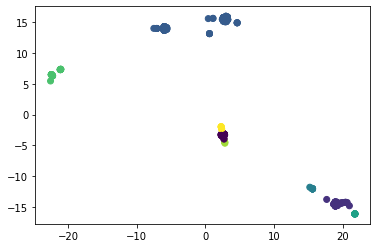

In [126]:
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys, c=final_df['label'])  #라벨은 색상으로 분류됨

plt.show()

In [22]:
# final_df.to_csv('jch_subm04.csv', index = False) 